In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
from problem import get_problem
from metrics import mean_Euclidean_dist

In [2]:
problem_name = "VLMOP2"
log_dir = f"logs_{problem_name}"
problem = get_problem(problem_name)

x = np.linspace(-1, 1, 100)
x = torch.from_numpy(x).unsqueeze(1)

truth_pareto = problem.evaluate(x).numpy()

f_truth = np.load(f"logs_{problem_name}/y_{problem_name}_6_warmup.npy")[49]

In [3]:
def plot_compare(log_dir = "logs", n_dim = 5, suffix = "", title = ""):
    # n_evaluation = int(suffix[-3:])
    index = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    # index = [1, 2, 5, 7, 9, 10, 11, 12, 15, 17, 19, 20]
    y_value = np.load(f"{log_dir}/y_{problem_name}_{n_dim}{suffix}.npy")
    font_size = 10
    scatter_size = 10
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    fig, axs = plt.subplots(figsize = (10, 10), ncols = int(len(index)/3), nrows=3, layout="constrained")
    axs = axs.flatten()
    for i, ind in enumerate(index):    
        axs[i].set_box_aspect(1)
        y_truth, y_hat = y_value[ind - 1], front_value[ind - 1]
        euclidean_score = mean_Euclidean_dist(f_truth, y_hat)
        axs[i].plot(truth_pareto[:, 0], truth_pareto[:, 1], color='blue', linewidth=1)
        axs[i].scatter(y_truth[:, 0], y_truth[:, 1], s=scatter_size , zorder=1, color = "red", label = "Pareto Solutions computed by Black-box function")
        axs[i].scatter(y_hat[:, 0], y_hat[:, 1], s=scatter_size , zorder=2, color = "green", label = "Pareto Solutions computed by Surrogate Model")
        axs[i].set_xlabel("f(1)", fontsize=font_size - 2, color="blue")
        axs[i].set_ylabel("f(2)", fontsize=font_size - 2, color="blue")
        axs[i].set_title(f"Iteration: {ind}\nPareto front score: {round(euclidean_score, 6)}", fontsize=font_size)
    fig.legend(*axs[1].get_legend_handles_labels(), bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=2, fontsize=font_size)
    # fig.suptitle(f"{problem_name.capitalize()} - PSL {title} - N dim: {n_dim}\nNumber of expensive evaluation: {n_evaluation}",fontweight="bold",fontsize=font_size + 5)
    fig.suptitle(f"{problem_name.capitalize()} - N dim: {n_dim} \n{title}",fontweight="bold",fontsize=font_size + 5)
    plt.show()

In [4]:
def Mean_Euclidean_distance_plot(problem_name = "DTLZ2", n_dim = 5, suffix = "", title = ""):
    log_dir = f"logs_{problem_name}"
    front_value = np.load(f"{log_dir}/front_{problem_name}_{n_dim}{suffix}.npy")
    euclidean_score = []
    for i in range(50):
        euclidean_score.append(mean_Euclidean_dist(f_truth, front_value[i]))
        
    plt.plot(euclidean_score, color = "green")
    plt.ylabel(r"Mean Euclidean distance score")
    plt.xlabel("Iteration")
    plt.title(f"{title}")
    plt.show()
    
def Mean_Euclidean_distance_plot2(problem_name = "DTLZ2", n_dim = 6):
    MED_original, MED_2stage_EHVI_120, MED_2stage_DGEMO_120, MED_2stage_EHVI_220, MED_2stage_DGEMO_220 = [],[],[],[],[]
    log_dir = f"logs_{problem_name}"
    
    f_original = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_original.npy")
    f_2stage_EHVI_120 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_EHVI_120.npy")
    f_2stage_DGEMO_120 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_120.npy")
    f_2stage_EHVI_220 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_EHVI_220.npy")
    f_2stage_DGEMO_220 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220.npy")
    
    
    for i in range(50):
        MED_original.append(mean_Euclidean_dist(f_truth, f_original[i]))
        MED_2stage_EHVI_120.append(mean_Euclidean_dist(f_truth, f_2stage_EHVI_120[i]))
        MED_2stage_DGEMO_120.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_120[i]))
        MED_2stage_EHVI_220.append(mean_Euclidean_dist(f_truth, f_2stage_EHVI_220[i]))
        MED_2stage_DGEMO_220.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220[i]))
        
    plt.plot(MED_original, color = "black", label = "PSL Original")
    plt.plot(MED_2stage_EHVI_120, color = "blue", label = "2 stage warm up with EHVI 120")
    plt.plot(MED_2stage_DGEMO_120, color = "green", label = "2 stage warm up with DGEMO 120")
    plt.plot(MED_2stage_EHVI_220, color = "orange", label = "2 stage warm up with EHVI 220")
    plt.plot(MED_2stage_DGEMO_220, color = "purple", label = "2 stage warm up with DGEMO 220")
    plt.ylabel("Mean Euclidean Score")
    plt.xlabel("Iteration")
    plt.title(r'Mean Eculidean distance between True Pareto Front $f_{true}(x)$'
              '\nand Pareto front computed by Surrogate model 'r'$\hat f(x)$')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    plt.show()

In [5]:
def Mean_Euclidean_distance_ablation(problem_name = "DTLZ2", n_dim = 6):
    MED_original, MED_warmup, MED_init, MED_2stage_DGEMO_220 = [],[],[],[]
    log_dir = f"logs_{problem_name}"
    
    f_original = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_original.npy")
    f_init = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_init_xavier.npy")
    f_warmup = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup.npy")
    f_2stage_DGEMO_220 = np.load(f"{log_dir}/front_{problem_name}_{n_dim}_warmup_init_DGEMO_220_xavier.npy")
    
    
    for i in range(50):
        MED_original.append(mean_Euclidean_dist(f_truth, f_original[i]))
        MED_init.append(mean_Euclidean_dist(f_truth, f_init[i]))
        MED_warmup.append(mean_Euclidean_dist(f_truth, f_warmup[i]))
        MED_2stage_DGEMO_220.append(mean_Euclidean_dist(f_truth, f_2stage_DGEMO_220[i]))
        
    plt.plot(MED_original, color = "black", label = "PSL Original")
    plt.plot(MED_init, color = "green", label = r"PSL with $\theta$ initialization")
    plt.plot(MED_warmup, color = "orange", label = "PSL warm up with DGEMO 220")
    plt.plot(MED_2stage_DGEMO_220, color = "purple", label = "2 stage warm up with DGEMO 220")
    plt.ylabel("Mean Euclidean Score")
    plt.xlabel("Iteration")
    plt.title(f'{problem_name} - N dim: {n_dim}\nMean Eculidean distance between True Pareto Front 'r'$f_{true}(x)$'
              '\nand Pareto front computed by Surrogate model 'r'$\hat f(x)$')
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=2)
    plt.show()

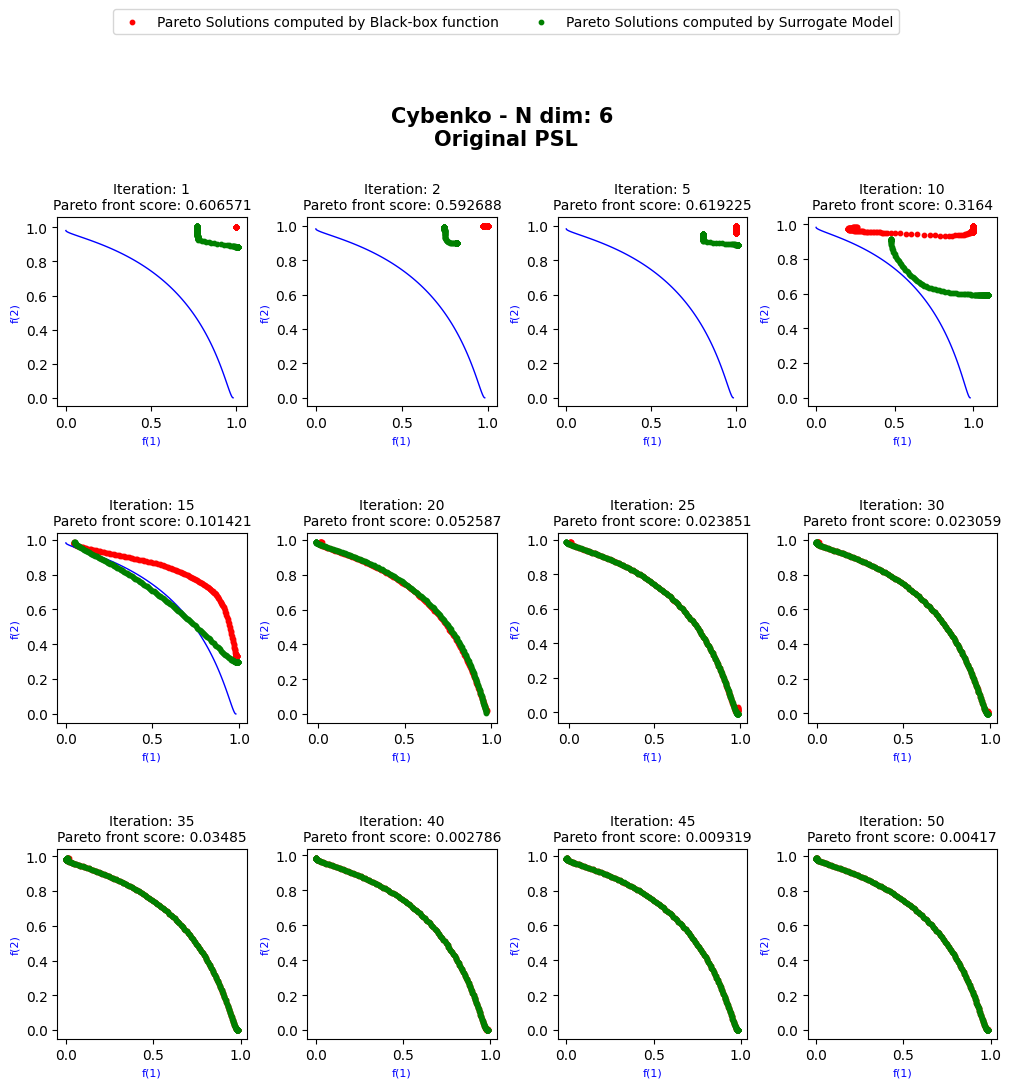

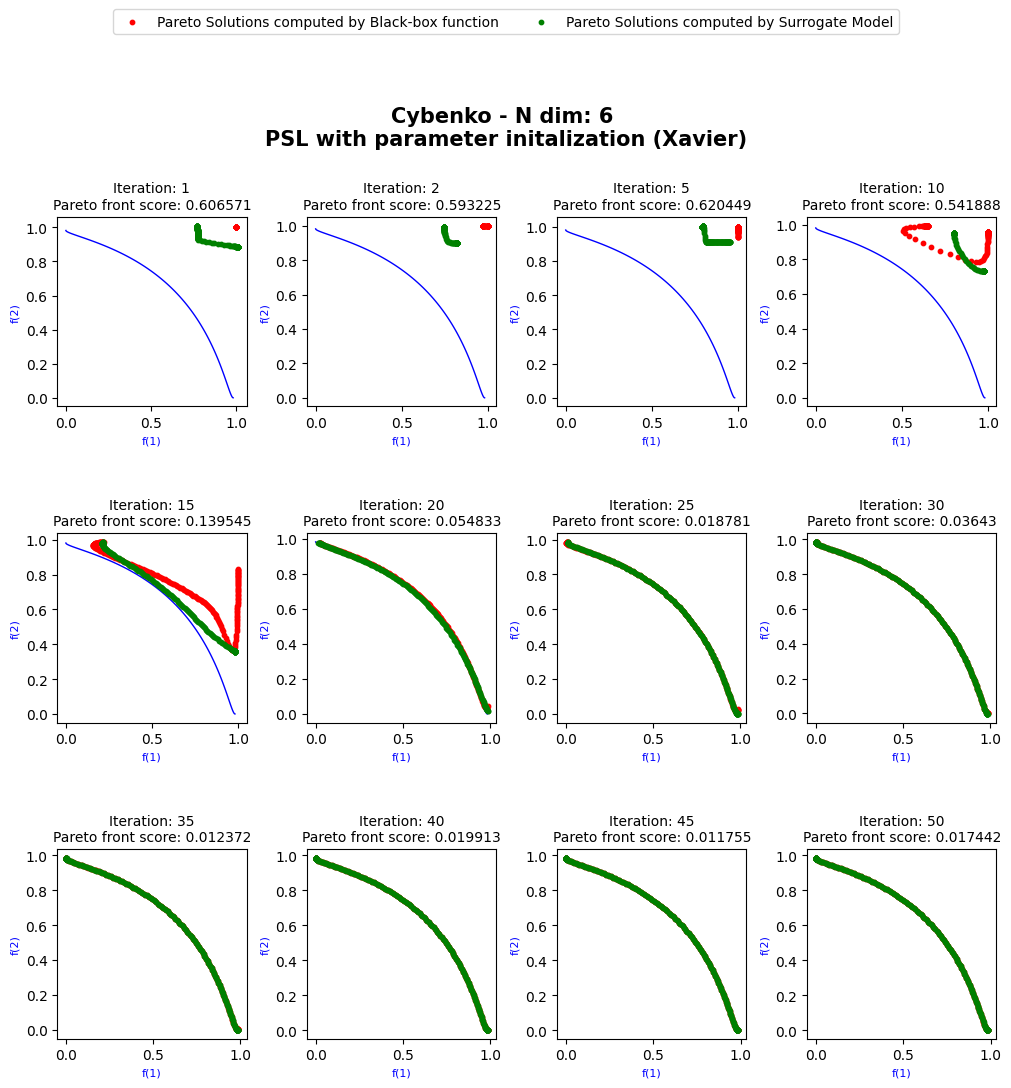

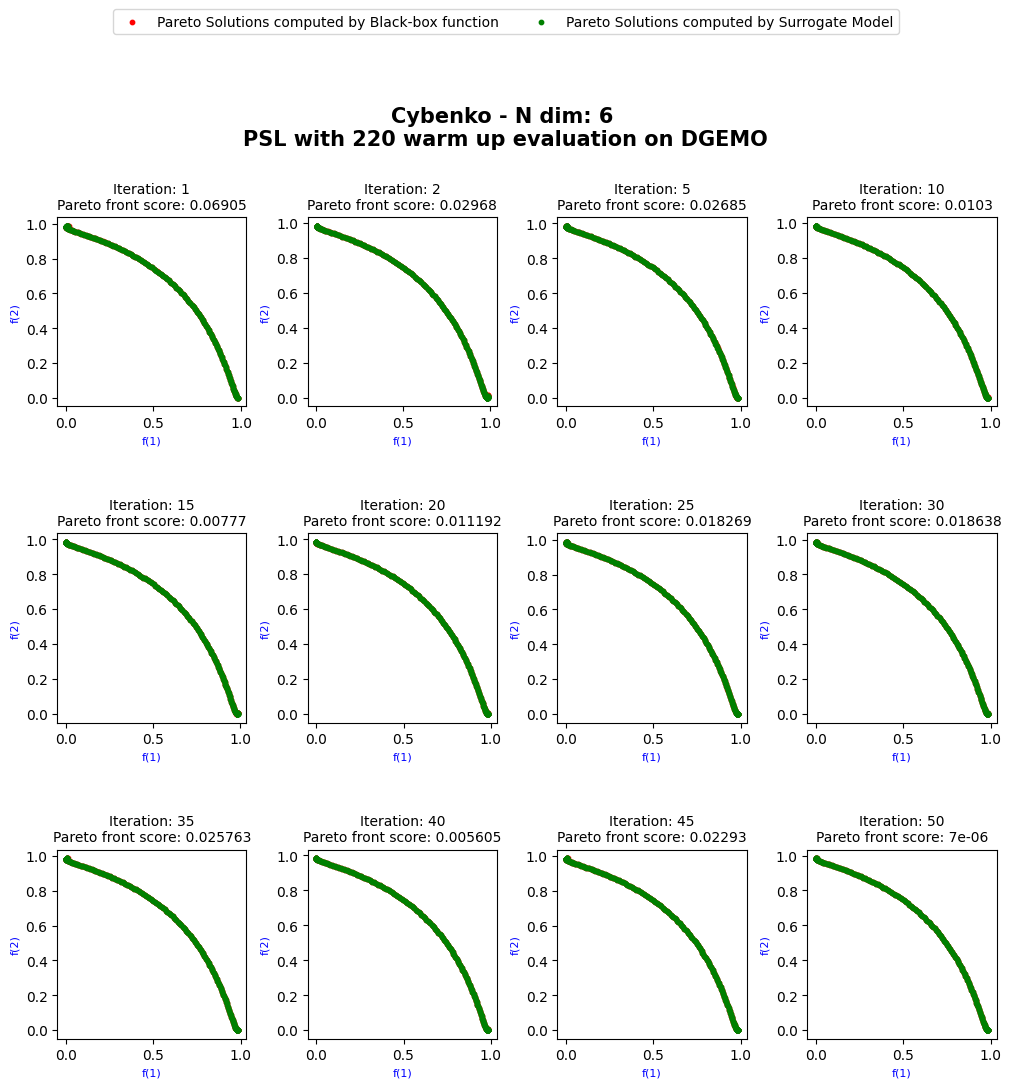

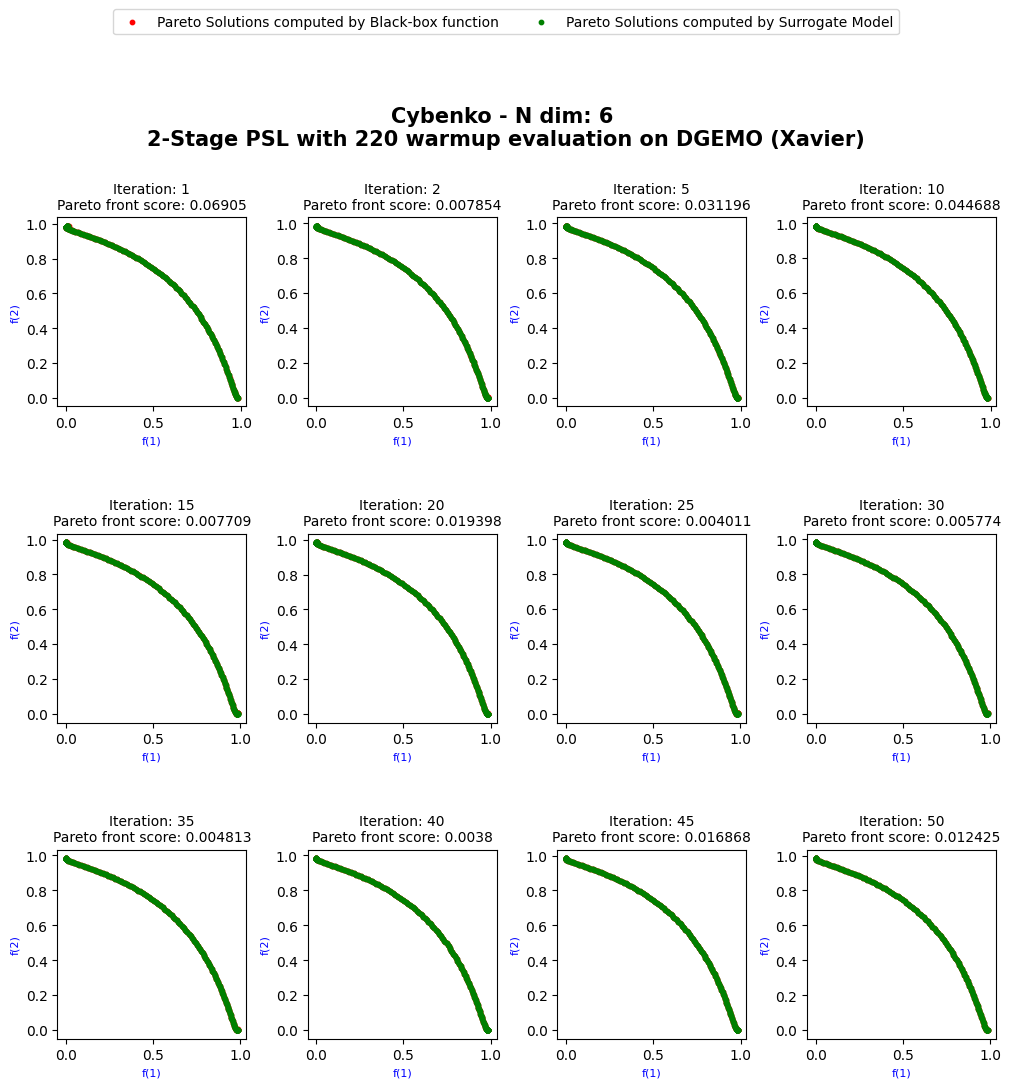

In [6]:
n_dim = 6
plot_compare(log_dir, n_dim, "_original", "Original PSL")
plot_compare(log_dir, n_dim, suffix="_init_xavier", title = "PSL with parameter initalization (Xavier)")
plot_compare(log_dir, n_dim, suffix="_warmup", title = "PSL with 220 warm up evaluation on DGEMO")
plot_compare(log_dir, n_dim, suffix="_warmup_init_DGEMO_220_xavier", title = "2-Stage PSL with 220 warmup evaluation on DGEMO (Xavier)")

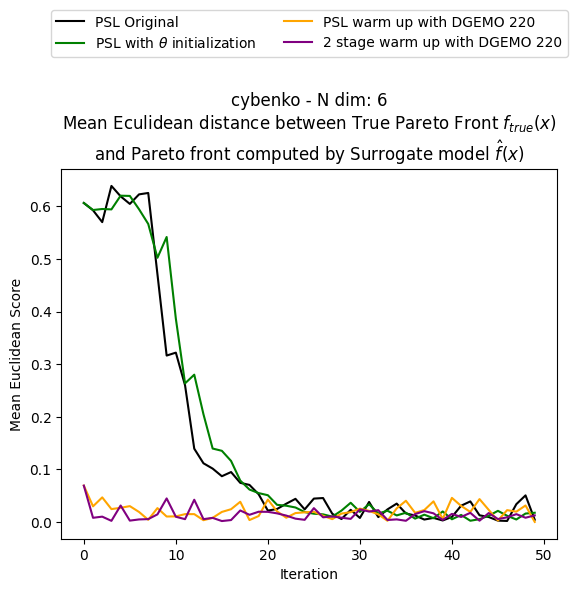

In [7]:

Mean_Euclidean_distance_ablation(problem_name, n_dim)